In [55]:
import pandas as pd

data = pd.read_csv('netflix_originals_com_nomes_e_nan.csv')
data.head(10)

,titulo,genero,pais,idioma,duracao,classificacao,data_lancamento,nota_imdb,mulheres_assistiram,homens_assistiram
0,Stranger Things,Drama,UK,Coreano,69 min,R,2013-07-23,7.0,NaN,16067.0
1,Quantum Love,Crime,France,Espanhol,54 min,TV-14,2013-02-01,5.1,20708.0,26548.0
2,Midnight Heist,Thriller,United States,Coreano,55 min,TV-14,2010-05-15,6.6,49798.0,NaN
3,Red Horizon,Sci-Fi,Germany,Hindi,28 min,TV-PG,2018-11-28,9.1,NaN,47312.0
4,Lost Frequencies,Crime,South Korea,Coreano,40 min,R,2022-04-05,4.2,10191.0,39497.0
5,Deep Web,Comedy,United States,Hindi,56 min,G,2022-12-20,7.2,37632.0,39030.0
6,The Iron Pact,Comedy,United States,Francês,127 min,TV-Y,2016-11-16,7.1,9927.0,41017.0
7,CyberStorm,Drama,UK,Português,34 min,G,2015-05-10,5.5,9307.0,20192.0
8,Stranger Things,Sci-Fi,Spain,Coreano,23 min,TV-PG,2021-08-25,6.8,20889.0,47002.0
9,The Forgotten Island,Crime,South Korea,Inglês,15 min,TV-14,2010-06-23,5.1,NaN,45141.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   titulo               200 non-null    object 
 1   genero               200 non-null    object 
 2   pais                 200 non-null    object 
 3   idioma               200 non-null    object 
 4   duracao              194 non-null    object 
 5   classificacao        186 non-null    object 
 6   data_lancamento      200 non-null    object 
 7   nota_imdb            194 non-null    float64
 8   mulheres_assistiram  186 non-null    float64
 9   homens_assistiram    179 non-null    float64
dtypes: float64(3), object(7)
memory usage: 15.8+ KB


In [57]:
data.describe()

,nota_imdb,mulheres_assistiram,homens_assistiram
count,194.000000,186.000000,179.000000
mean,6.585567,24372.231183,23795.329609
std,1.699527,14838.107092,14725.242832
min,4.000000,547.000000,1045.000000
25%,5.025000,10353.250000,11595.500000
50%,6.500000,24233.500000,22256.000000
75%,8.125000,37885.750000,36852.000000
max,9.500000,49826.000000,49690.000000


In [58]:
data.isna().sum()


titulo                  0
genero                  0
pais                    0
idioma                  0
duracao                 6
classificacao          14
data_lancamento         0
nota_imdb               6
mulheres_assistiram    14
homens_assistiram      21
dtype: int64

In [59]:
# Escolhido trocar o NaN por 0, pois a média de duração não faz sentido para o dataset
# Outros valores nulos foram preenchidos com a média da coluna

data['duracao'] = data['duracao'].str.replace(' min', '', regex=False)
data['duracao'].replace('', '0', regex=False, inplace=True)
data['duracao'] = data['duracao'].astype(float)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data.fillna(data[numeric_columns].mean(), inplace=True)

C:\Users\tntga\AppData\Local\Temp\ipykernel_17624\45107267.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['duracao'].replace('', '0', regex=False, inplace=True)


In [60]:
data.isna().sum()

titulo                  0
genero                  0
pais                    0
idioma                  0
duracao                 0
classificacao          14
data_lancamento         0
nota_imdb               0
mulheres_assistiram     0
homens_assistiram       0
dtype: int64

In [61]:
classificacao_map = {
    'G': 0,
    'PG': 10,
    'PG-13': 12,
    'R': 16,
    'TV-Y': 0,
    'TV-Y7': 7,
    'TV-G': 0,
    'TV-PG': 10 ,
    'TV-14': 14,
    'TV-MA': 18
}

# Valores que são nulos são removidos, pois não há como preencher com a média

data.dropna(inplace=True)

data['classificacao'] = data['classificacao'].map(classificacao_map).fillna(data['classificacao'])
data['classificacao']

0      16
1      14
2      14
3      10
4      16
       ..
195    18
196    18
197    10
198     0
199    10
Name: classificacao, Length: 186, dtype: int64

In [62]:
data.isna().sum()

titulo                 0
genero                 0
pais                   0
idioma                 0
duracao                0
classificacao          0
data_lancamento        0
nota_imdb              0
mulheres_assistiram    0
homens_assistiram      0
dtype: int64

In [63]:
data['total_espectadores'] = (data['homens_assistiram'] + data['mulheres_assistiram']).round(0).astype(int)
data['total_espectadores']

0      40439
1      47256
2      73593
3      71684
4      49688
       ...  
195    48720
196    48376
197    55877
198    45991
199    86553
Name: total_espectadores, Length: 186, dtype: int64

In [64]:
paises_map = {
    'France': 'FR',
    'United States': 'USA',
    'Germany': 'GER',
    'South Korea': 'KOR',
    'Spain': 'ES',
    'U.S.': 'USA',
    'Japan': 'JP',
    'Brazil': 'BR' ,
    'India': 'IN',
}



data['pais'] = data['pais'].map(paises_map).fillna(data['pais'])
data['pais']

data['pais'].unique()

array(['UK', 'FR', 'USA', 'GER', 'KOR', 'ES', 'JP', 'BR', 'IN'],
      dtype=object)

In [65]:
data['publico_predominante'] = ['Mulheres' if data['mulheres_assistiram'].iloc[i] > data['homens_assistiram'].iloc[i] else 'Homens' if data['homens_assistiram'].iloc[i] > data['mulheres_assistiram'].iloc[i] else 'Empate' for i in range(len(data))]

In [66]:
data['ano_lancamento'] = [int(i.split('-')[0]) for i in data['data_lancamento']]
data['ano_lancamento']

0      2013
1      2013
2      2010
3      2018
4      2022
       ... 
195    2015
196    2022
197    2020
198    2013
199    2015
Name: ano_lancamento, Length: 186, dtype: int64

In [67]:
data['mes_lancamento'] = [int(i.split('-')[1]) for i in data['data_lancamento']]
data['mes_lancamento']

0       7
1       2
2       5
3      11
4       4
       ..
195     4
196    10
197     4
198     3
199    11
Name: mes_lancamento, Length: 186, dtype: int64

In [68]:
data.sort_values(by='total_espectadores', ascending=False)

,titulo,genero,pais,idioma,duracao,classificacao,data_lancamento,nota_imdb,mulheres_assistiram,homens_assistiram,total_espectadores,publico_predominante,ano_lancamento,mes_lancamento
30,The Iron Pact,Documentary,JP,Português,103.000000,0,2018-09-12,7.9,49161.0,47788.0,96949,Mulheres,2018,9
39,Beyond the Stars,Sci-Fi,GER,Espanhol,99.000000,10,2011-06-08,8.9,49826.0,41019.0,90845,Mulheres,2011,6
21,La Casa de Papel,Crime,ES,Hindi,179.000000,10,2020-09-09,7.4,47605.0,40981.0,88586,Mulheres,2020,9
57,City of Whispers,Horror,USA,Francês,151.000000,18,2018-02-03,6.7,44970.0,43048.0,88018,Mulheres,2018,2
46,The Iron Pact,Thriller,BR,Inglês,193.000000,18,2017-11-18,4.4,48052.0,38549.0,86601,Mulheres,2017,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Galactic Tide,Romance,USA,Espanhol,56.000000,0,2012-07-21,4.0,6276.0,4699.0,10975,Mulheres,2012,7
124,Red Horizon,Drama,KOR,Japonês,19.000000,0,2018-06-25,6.4,8001.0,1499.0,9500,Mulheres,2018,6
18,CyberStorm,Drama,IN,Japonês,84.798969,16,2021-06-10,4.7,4778.0,3496.0,8274,Mulheres,2021,6
36,Dream Catchers,Crime,BR,Coreano,30.000000,0,2021-11-02,9.1,4025.0,1349.0,5374,Mulheres,2021,11


In [69]:
data['total_espectadores'].groupby(data['genero']).sum().sort_values(ascending=False)

genero
Sci-Fi         1516595
Crime          1233079
Thriller       1130760
Comedy         1065996
Action          986605
Romance         868332
Horror          761640
Documentary     716528
Drama           663763
Name: total_espectadores, dtype: int64

In [70]:
data.groupby(data['ano_lancamento']).size().sort_values(ascending=False)

ano_lancamento
2021    22
2018    19
2017    16
2013    16
2012    16
2020    15
2016    15
2022    13
2019    12
2010    11
2015    11
2014    10
2011    10
dtype: int64

In [71]:
data.groupby(data['idioma']).size().sort_values(ascending=False)

idioma
Hindi        35
Francês      34
Coreano      28
Espanhol     26
Inglês       21
Japonês      21
Português    21
dtype: int64

<Axes: title={'center': 'Classificação por Gênero'}, xlabel='genero'>

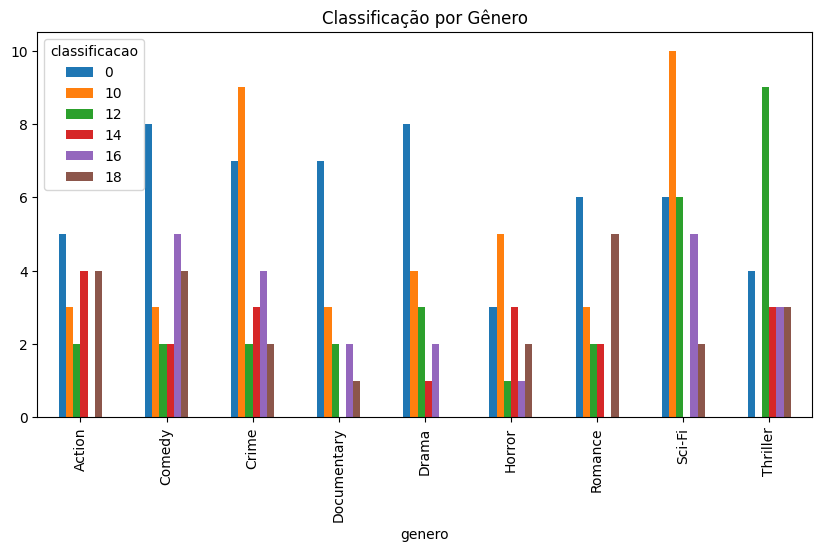

In [72]:
pd.crosstab(data['genero'], data['classificacao']).plot(kind='bar', figsize=(10, 5), title='Classificação por Gênero')

<Axes: title={'center': 'Distribuição de gêneros por ano de lançamento'}, xlabel='idioma'>

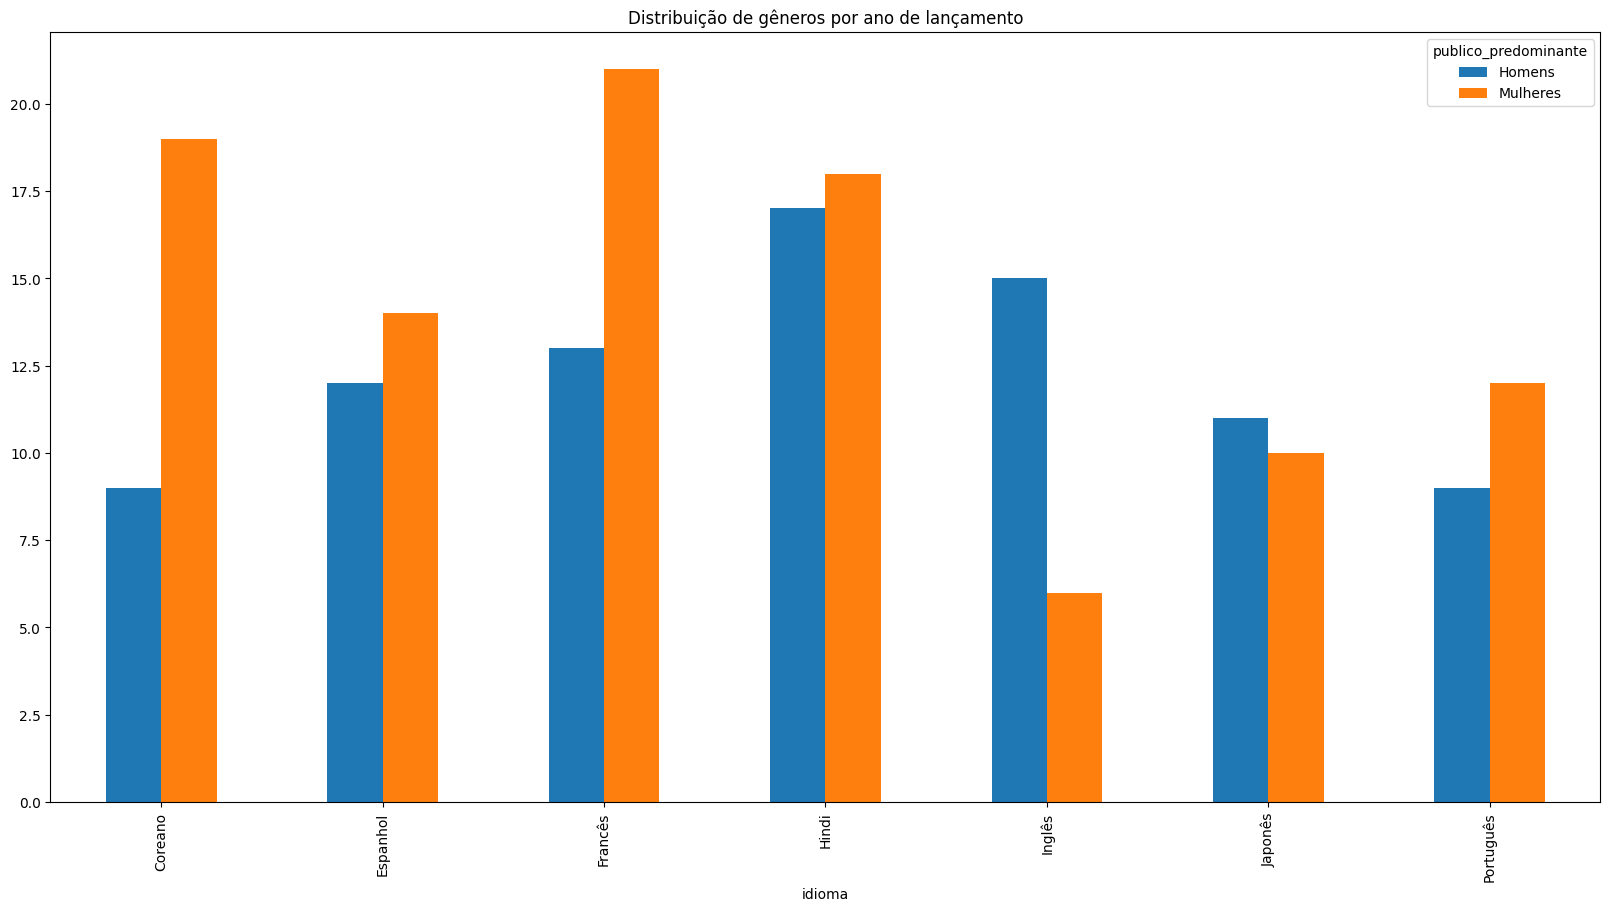

In [73]:
pd.crosstab(data['idioma'], data['publico_predominante']).plot(kind='bar', figsize=(20, 10), title='Distribuição de gêneros por ano de lançamento')

In [74]:
dumies = pd.get_dummies(data['classificacao'], prefix='classificacao')
data = pd.concat([data, dumies], axis=1)
data

,titulo,genero,pais,idioma,duracao,classificacao,data_lancamento,nota_imdb,mulheres_assistiram,homens_assistiram,total_espectadores,publico_predominante,ano_lancamento,mes_lancamento,classificacao_0,classificacao_10,classificacao_12,classificacao_14,classificacao_16,classificacao_18
0,Stranger Things,Drama,UK,Coreano,69.0,16,2013-07-23,7.000000,24372.231183,16067.000000,40439,Mulheres,2013,7,False,False,False,False,True,False
1,Quantum Love,Crime,FR,Espanhol,54.0,14,2013-02-01,5.100000,20708.000000,26548.000000,47256,Homens,2013,2,False,False,False,True,False,False
2,Midnight Heist,Thriller,USA,Coreano,55.0,14,2010-05-15,6.600000,49798.000000,23795.329609,73593,Mulheres,2010,5,False,False,False,True,False,False
3,Red Horizon,Sci-Fi,GER,Hindi,28.0,10,2018-11-28,9.100000,24372.231183,47312.000000,71684,Homens,2018,11,False,True,False,False,False,False
4,Lost Frequencies,Crime,KOR,Coreano,40.0,16,2022-04-05,4.200000,10191.000000,39497.000000,49688,Homens,2022,4,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Shadow Pulse,Action,IN,Japonês,72.0,18,2015-04-14,6.585567,36385.000000,12335.000000,48720,Mulheres,2015,4,False,False,False,False,False,True
196,City of Whispers,Crime,USA,Francês,175.0,18,2022-10-28,8.200000,34727.000000,13649.000000,48376,Mulheres,2022,10,False,False,False,False,False,True
197,La Casa de Papel,Romance,JP,Japonês,85.0,10,2020-04-28,6.300000,39902.000000,15975.000000,55877,Mulheres,2020,4,False,True,False,False,False,False
198,Beyond the Stars,Action,USA,Espanhol,153.0,0,2013-03-09,4.800000,42724.000000,3267.000000,45991,Mulheres,2013,3,True,False,False,False,False,False


In [75]:
data['total_espectadores'].groupby(data['classificacao']).sum().sort_values(ascending=False)

classificacao
0     2326337
10    2059541
12    1345583
18    1165835
14    1046138
16     999864
Name: total_espectadores, dtype: int64

In [76]:
data['nota_imdb'].groupby(data['classificacao']).mean().round(2).sort_values(ascending=False)

classificacao
16    6.89
0     6.64
10    6.63
18    6.62
14    6.58
12    6.38
Name: nota_imdb, dtype: float64

In [77]:
import re

data['contém_palavras'] = data['titulo'].str.contains(r'\b(Love|Dream|War)\b', flags=re.IGNORECASE, regex=True)

contagem_titulos = data['contém_palavras'].sum()

media_nota_imdb = data.loc[data['contém_palavras'], 'nota_imdb'].mean()

print(contagem_titulos, media_nota_imdb)

17 6.946209824135839


C:\Users\tntga\AppData\Local\Temp\ipykernel_17624\2497014352.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['contém_palavras'] = data['titulo'].str.contains(r'\b(Love|Dream|War)\b', flags=re.IGNORECASE, regex=True)


<Axes: title={'center': 'Distribuição de títulos por país'}, xlabel='País', ylabel='Quantidade de títulos'>

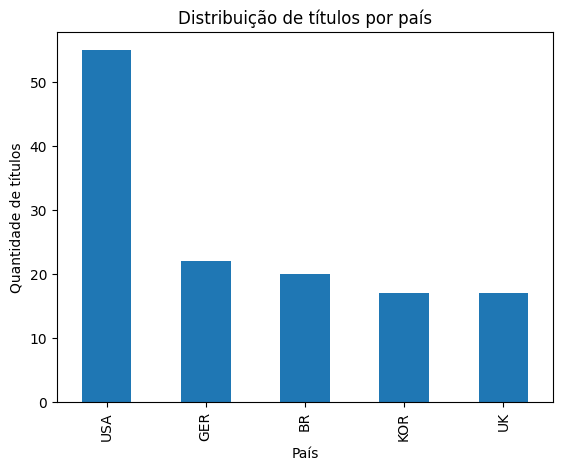

In [78]:
data.groupby(data['pais']).size().sort_values(ascending=False).head(5).plot(kind='bar',title='Distribuição de títulos por país', xlabel='País', ylabel='Quantidade de títulos')

<Axes: title={'center': 'Distribuição de gêneros'}>

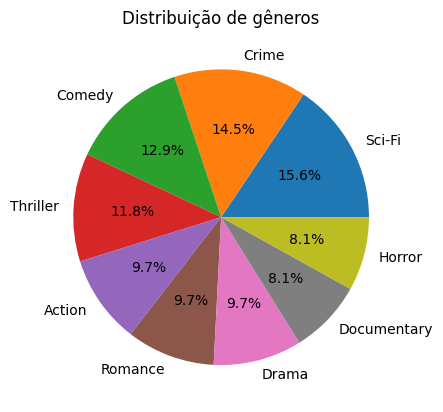

In [79]:
data.groupby(data['genero']).size().sort_values(ascending=False).plot(kind='pie', title='Distribuição de gêneros', autopct='%1.1f%%')

<Axes: title={'center': 'Distribuição de títulos por ano de lançamento'}, xlabel='Ano de Lançamento', ylabel='Quantidade de títulos'>

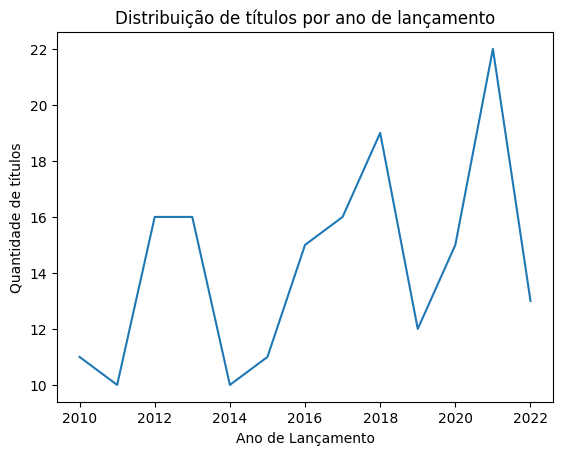

In [80]:
data.groupby(data['ano_lancamento']).size().plot(kind='line', title='Distribuição de títulos por ano de lançamento', xlabel='Ano de Lançamento', ylabel='Quantidade de títulos')

<Axes: title={'center': 'Média de espectadores por gênero'}, xlabel='Gênero', ylabel='Média de espectadores'>

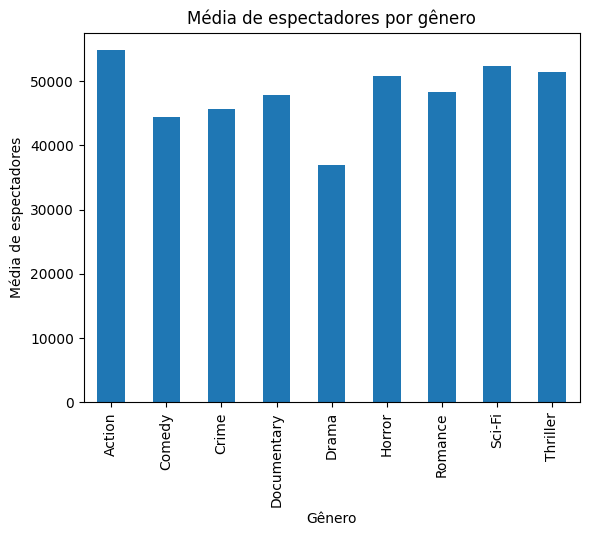

In [81]:
data['total_espectadores'].groupby(data['genero']).mean().round(2).plot(kind='bar', title='Média de espectadores por gênero', xlabel='Gênero', ylabel='Média de espectadores')